#Fashion-MNIST-Evrişimli Sinir Ağı

Colab için kimlik doğrulama işlemleri....

In [20]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [21]:
#Drivemdaki durumu görmek istiyorum.
import os
os.chdir('/gdrive/My Drive')

In [22]:
!ls


 Aktivasyon_fonks.ipynb
 Aktivasyon_Fonksiyonları_Karşılaştırması.ipynb
 Calisma_ortami
 EvrisimliSinirAgi_AdimAdim.ipynb
 fashion_MNIST_CNN.ipynb
'Katmanlar ve Modeller.ipynb'
 MNIST_YSA.ipynb
 save_models
'Vektörler Matrisler Tensörler.ipynb'


##Kütüphane Kurulumu

In [23]:
!pip install -q keras

##Fashion MNIST veri setine bir göz atalım!!

Gerekli paketleri yükleyelimm...

In [24]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random


Verileri internet üzerinden yükleyelimm.

In [25]:
#Veri setlerini yükleme
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

print('x_train shape:' , x_train.shape)
print(x_train.shape[0], 'eğitim örnekleri')
print(x_test.shape[0], 'test örnekleri')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train shape: (60000, 28, 28)
60000 eğitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Veriler içinden bir örnek görelim:))


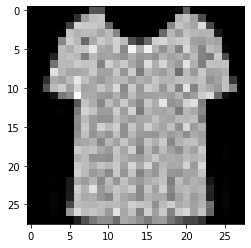

In [26]:
plt.imshow(x_test[1000], cmap = 'gray')

##10 sınıftan oluşan Fashion MNIST veri kümesinde hangi sınıflar bakalım!!

In [27]:
fashion_mnist_labels = np.array([
                                'Tişört/Üst',
                                 'Pantolon',
                                 'Kazak',
                                 'Elbise',
                                 'Ceket',
                                 'Sandalet',
                                 'Gömlek',
                                 'Sneaker',
                                 'Çanta',
                                 'Bilekte Bot'])

Daha önce eğitilmiş olan modelin model_fashion_mnist_cnn_train2_epoch24.h5dosyaından çekelim ve giriş görüntülerini model girişine uygun şekilde ön işlemlerden geçirelim!!

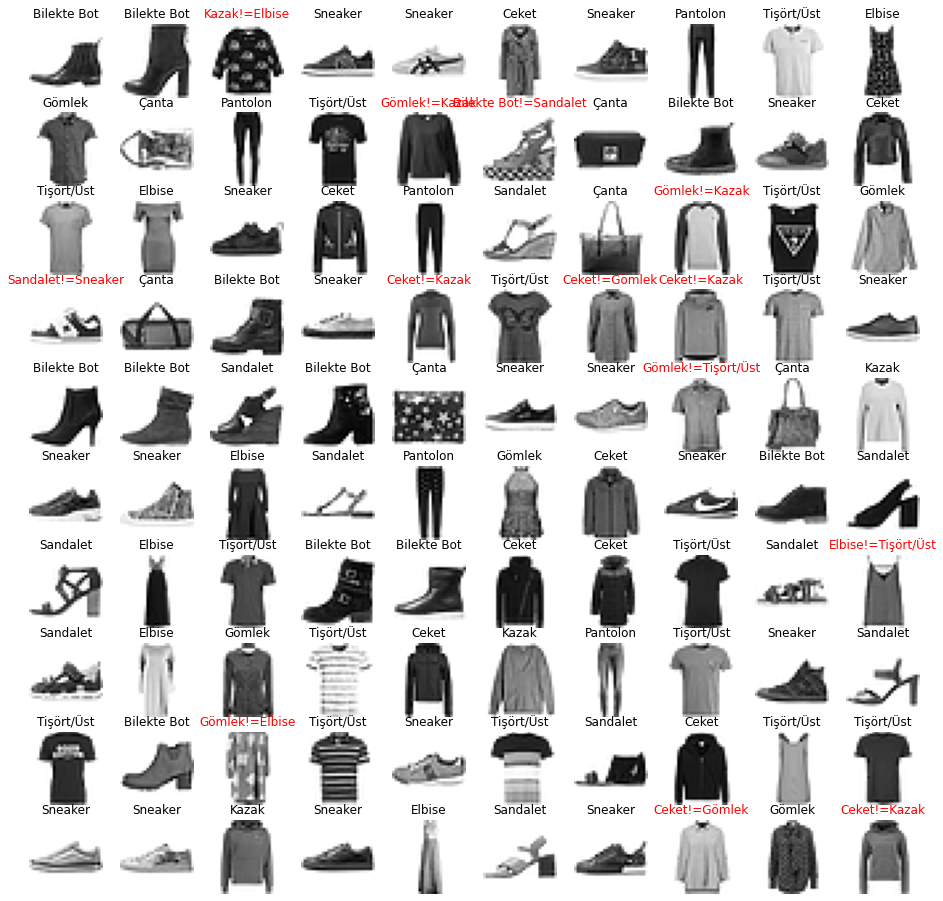

In [30]:
root = '/gdrive/My Drive/save_models/'
model = load_model(root + 'model_fashion-mnist_cnn_train2_epoch24.h5')
#İlk önce normalizasyon yaptık.
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')
#prediction yparken doğru ve yanlış predict ettiklerimizi ekrana yazdırmaya çalışıyoruz. 10 tane class için
    ret = model.predict(data, batch_size=1) 
    #yazdır(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        #hatalı labelları kırmızı ile belirt diyoruz.
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1

  

In [31]:
plt.show()
print("Doğru tahminlerin sayısı: ", right)
print("Hata sayısı: ", mistake)
print("Doğru tahmin oranı: ",right/(mistake + right)*100, "%")

Doğru tahminlerin sayısı:  87
Hata sayısı:  13
Doğru tahmin oranı:  87.0 %
